In [ ]:
pip install pandas sktime statsmodels matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 11.2 MB/s eta 0:00:00


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


ADF Statistic: -1.499203918842808
p-value: 0.5339051120538568
Critical Values:
   1%: -3.9644434814814815
   5%: -3.0849081481481484
   10%: -2.6818144444444445


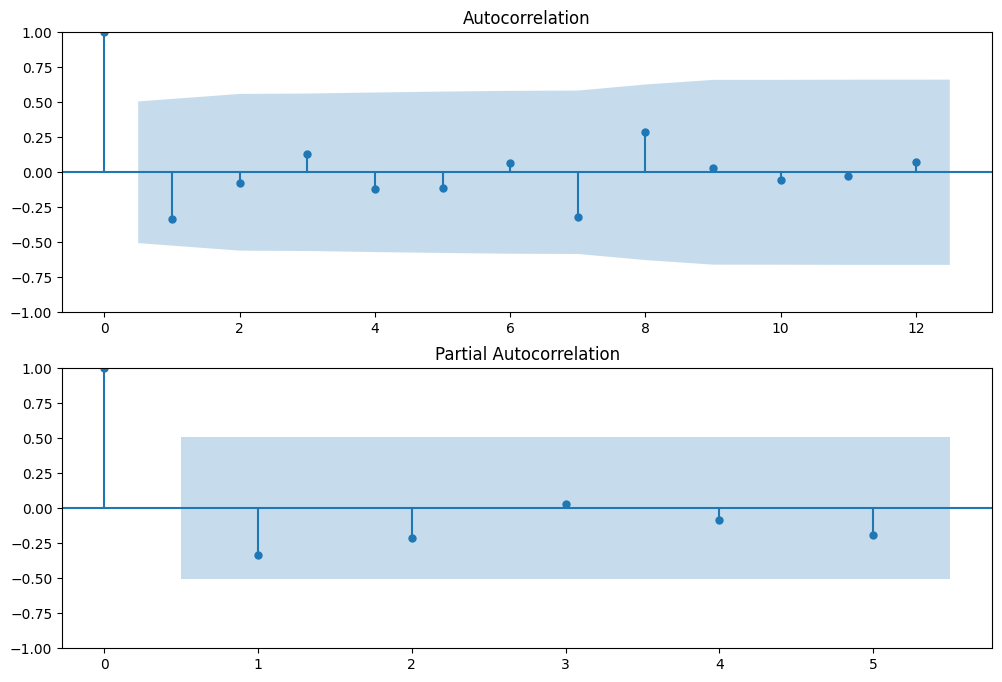

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Percentage Error (MAPE): 0.1655247389117491


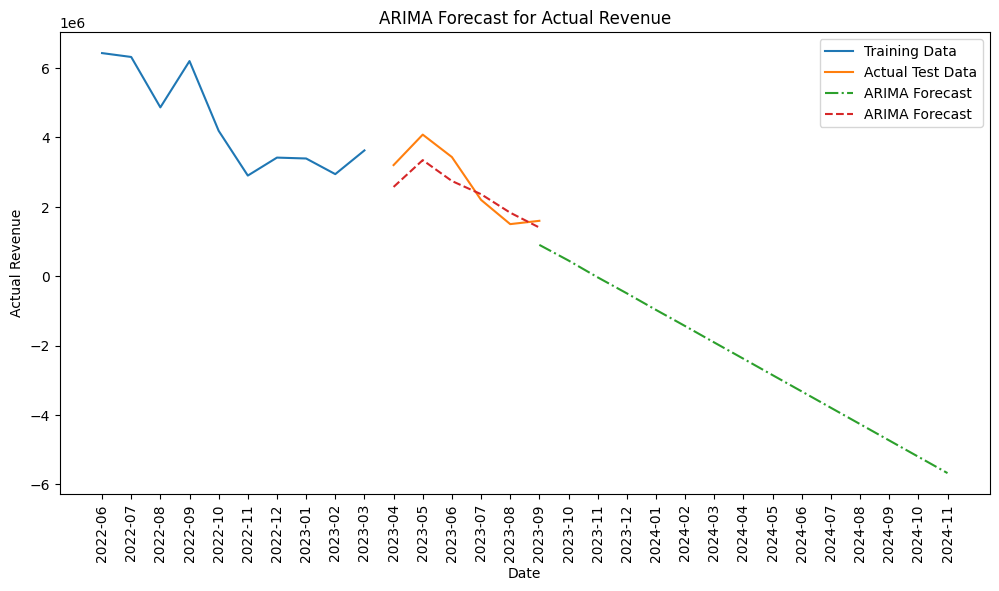

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.forecasting.base import ForecastingHorizon

# Load CSV file
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Aproximiated Financial Data - Sheet1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)
# Map month names to numerical representation
month_mapping = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

# Convert 'month' column to numeric
df['month'] = df['month'].map(month_mapping)

# # Create a PeriodIndex using a simpler approach
df['period'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-1')

# Set 'period' column as the index
df.set_index('period', inplace=True)

df.index = pd.PeriodIndex(df.index, freq="M")

# Select the target column (Actual Revenue)
y = df['Actual Revenue']

# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(y)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# If the series is not stationary, take the first difference
if result[1] > 0.05:
    y_diff = y.diff().dropna()
else:
    y_diff = y

# Plot ACF and PACF for determining ARIMA parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(y_diff, ax=ax[0])
plot_pacf(y_diff, lags=5, ax=ax[1])  # Set nlags to a smaller value, e.g., 10
plt.show()

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(y, test_size=6)
# Fit ARIMA model
order = (1, 1, 1)  # You may need to adjust these parameters based on ACF and PACF plots
model = ARIMA(order=order)
model.fit(y_train)


fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-03-31", periods=6, freq="M")), is_relative=False
)

# Make forecasts for the next 12 months
y_pred = model.predict(fh)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})

# Extend prediction to December 2024
forecast_horizon = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-09-30", periods=15, freq="M")), is_relative=False
)
y_pred_2 = model.predict(fh=forecast_horizon)

# Create a DataFrame with the results
results_df_2 = pd.DataFrame({
    'Predicted': y_pred_2,
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index.astype(str), y_train, label='Training Data')
plt.plot(y_test.index.astype(str), y_test, label='Actual Test Data')
plt.plot(results_df_2.index.astype(str), y_pred_2, label='ARIMA Forecast', linestyle='-.')
plt.plot(y_test.index.astype(str), y_pred, label='ARIMA Forecast', linestyle='dashed')
plt.xticks(rotation=90)
plt.title('ARIMA Forecast for Actual Revenue')
plt.xlabel('Date')
plt.ylabel('Actual Revenue')
plt.legend()
plt.show()


In [ ]:
print(y.index.freq)

None


ADF Statistic: -0.4859788721468361
p-value: 0.8947237053712893
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


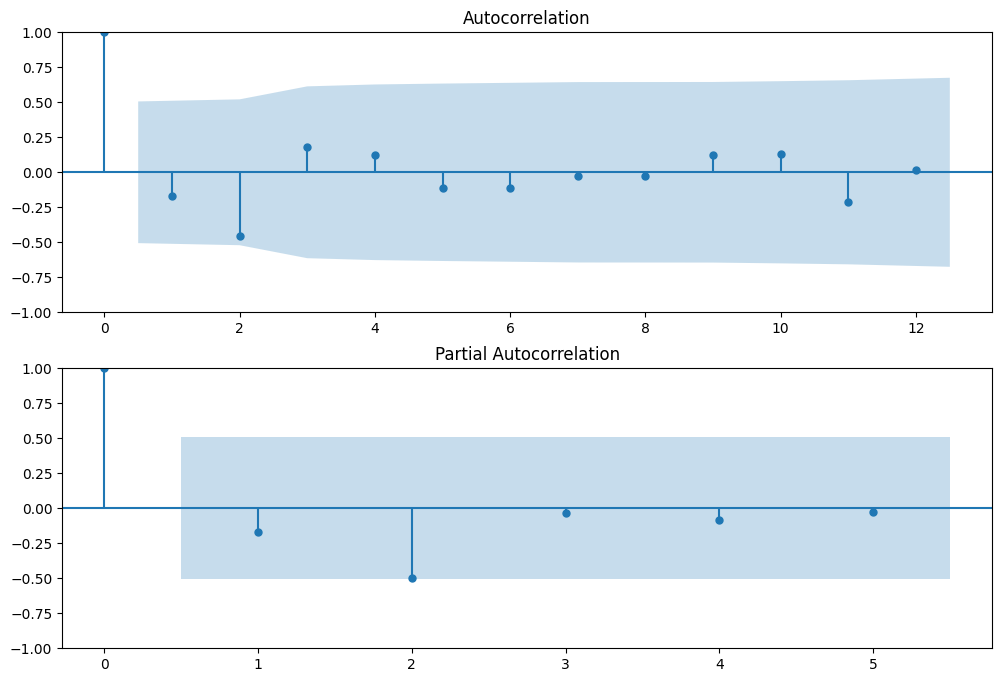

Mean Absolute Percentage Error (MAPE): 0.1851021979278738


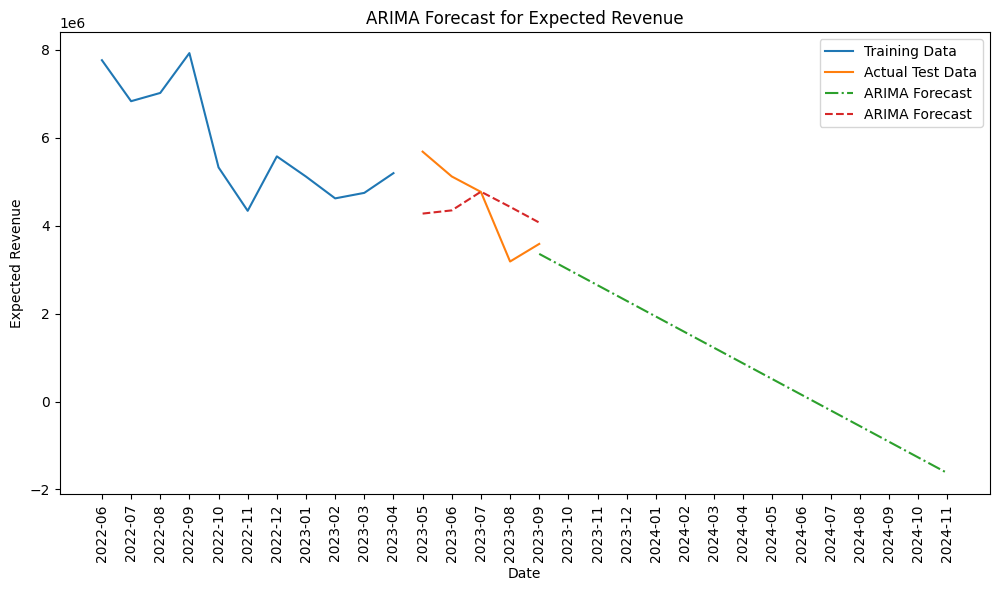

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.forecasting.base import ForecastingHorizon

# Load CSV file
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Aproximiated Financial Data - Sheet1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)
# Map month names to numerical representation
month_mapping = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

# Convert 'month' column to numeric
df['month'] = df['month'].map(month_mapping)

# # Create a PeriodIndex using a simpler approach
df['period'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-1')

# Set 'period' column as the index
df.set_index('period', inplace=True)

df.index = pd.PeriodIndex(df.index, freq="M")

# Select the target column (Actual Revenue)
y = df['Expected Revenue']

# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(y)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# If the series is not stationary, take the first difference
if result[1] > 0.05:
    y_diff = y.diff().dropna()
else:
    y_diff = y

# Plot ACF and PACF for determining ARIMA parameters
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(y_diff, ax=ax[0])
plot_pacf(y_diff, lags=5, ax=ax[1])  # Set nlags to a smaller value, e.g., 10
plt.show()

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(y, test_size=5)
# Fit ARIMA model
order = (1, 1, 1)  # You may need to adjust these parameters based on ACF and PACF plots
model = ARIMA(order=order)
model.fit(y_train)


fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-03-31", periods=5, freq="M")), is_relative=False
)

# Make forecasts for the next 12 months
y_pred = model.predict(fh)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})

# Extend prediction to December 2024
forecast_horizon = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-09-30", periods=15, freq="M")), is_relative=False
)
y_pred_2 = model.predict(fh=forecast_horizon)

# Create a DataFrame with the results
results_df_2 = pd.DataFrame({
    'Predicted': y_pred_2,
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index.astype(str), y_train, label='Training Data')
plt.plot(y_test.index.astype(str), y_test, label='Actual Test Data')
plt.plot(results_df_2.index.astype(str), y_pred_2, label='ARIMA Forecast', linestyle='-.')
plt.plot(y_test.index.astype(str), y_pred, label='ARIMA Forecast', linestyle='dashed')
plt.xticks(rotation=90)
plt.title('ARIMA Forecast for Expected Revenue')
plt.xlabel('Date')
plt.ylabel('Expected Revenue')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


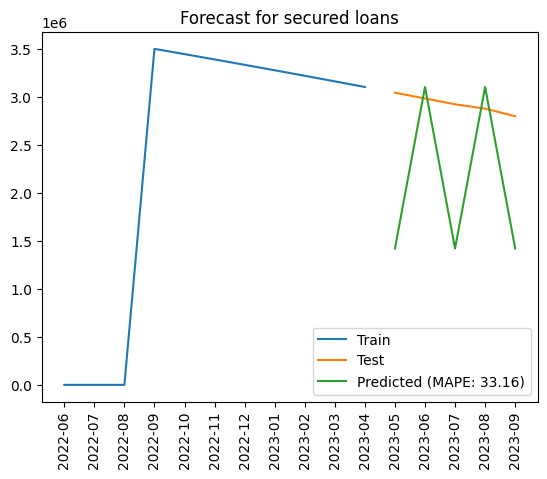

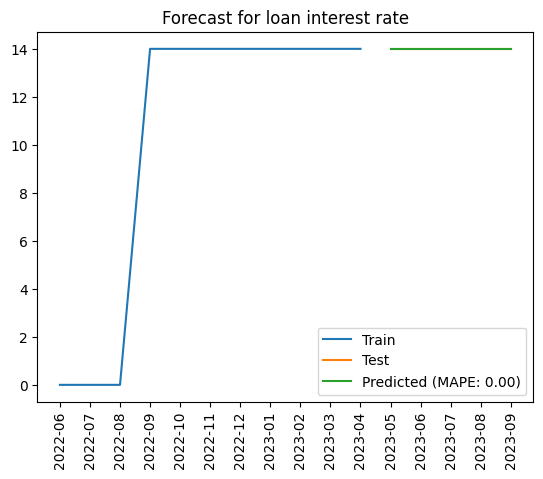

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


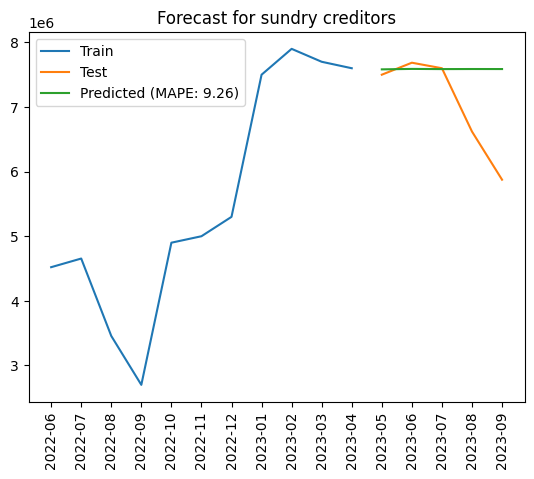

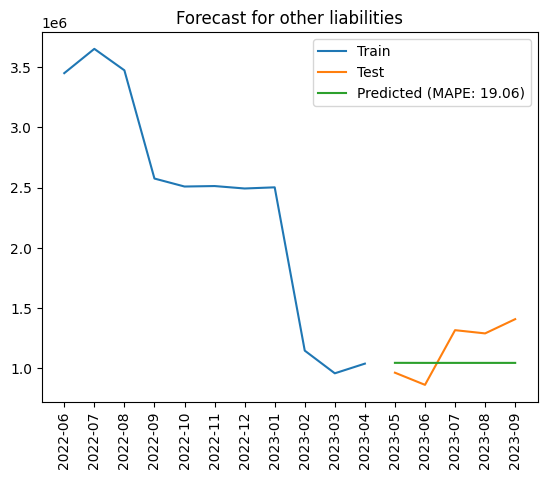

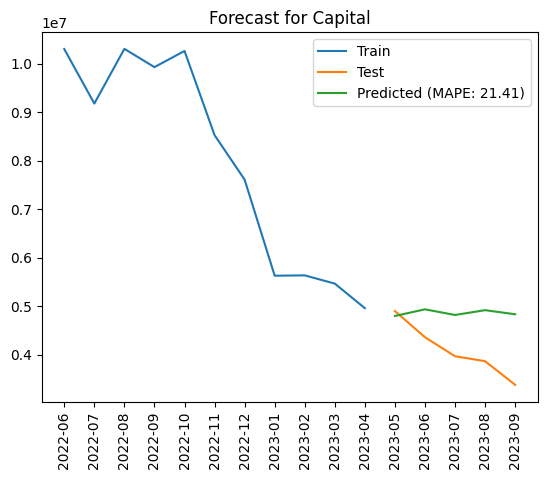

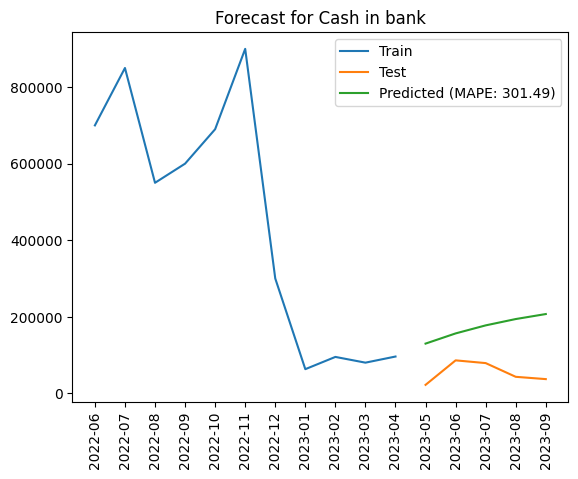

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


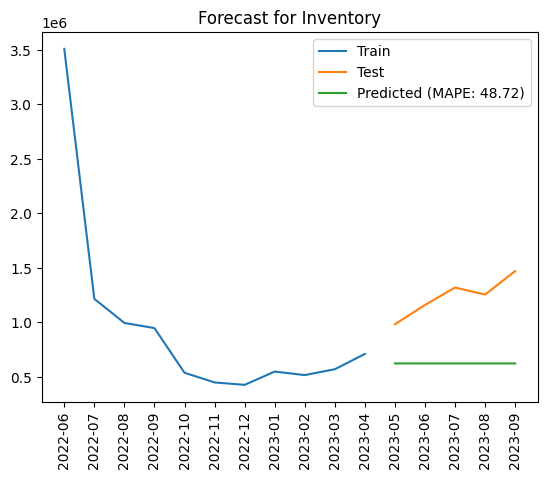

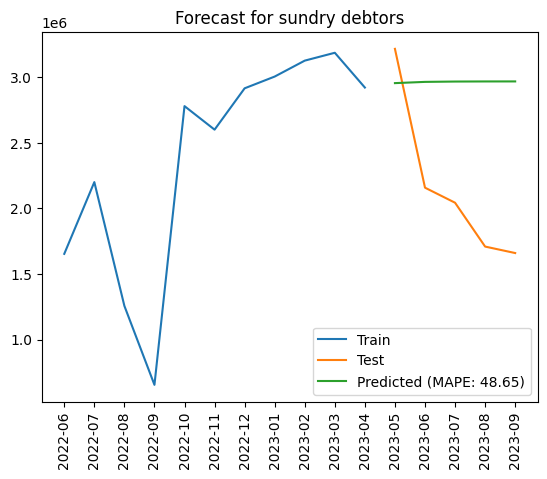

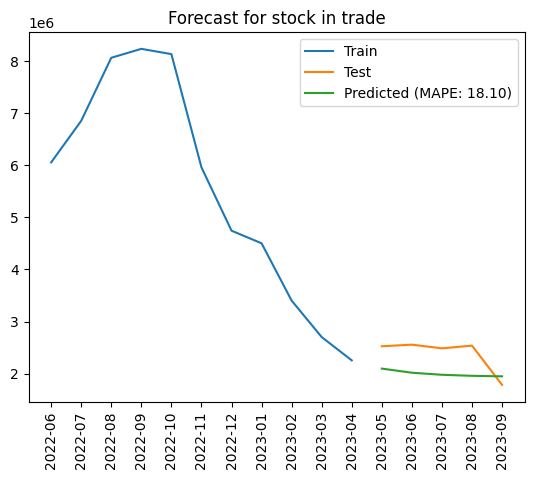

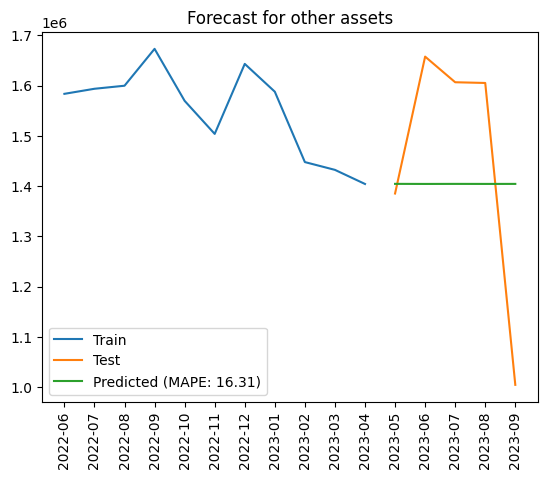

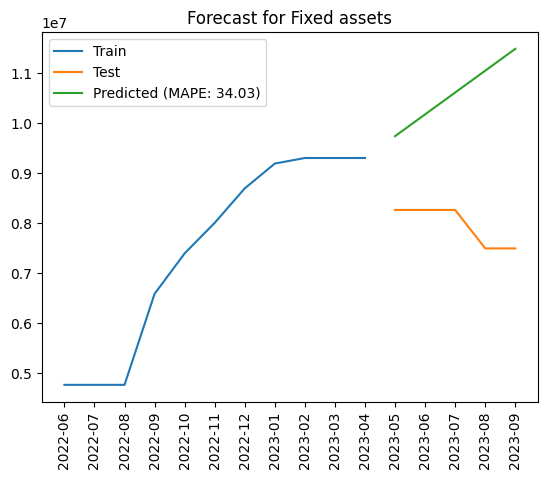

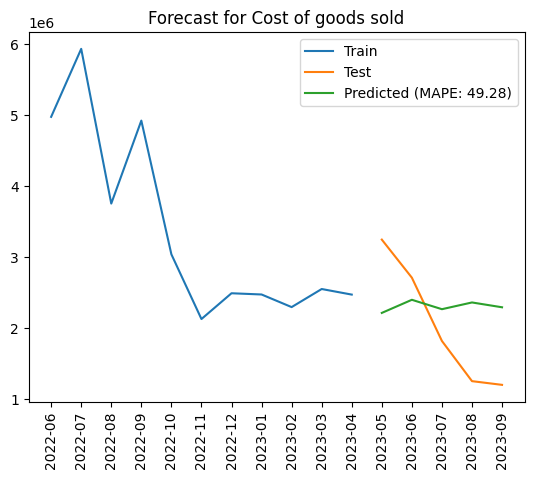

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


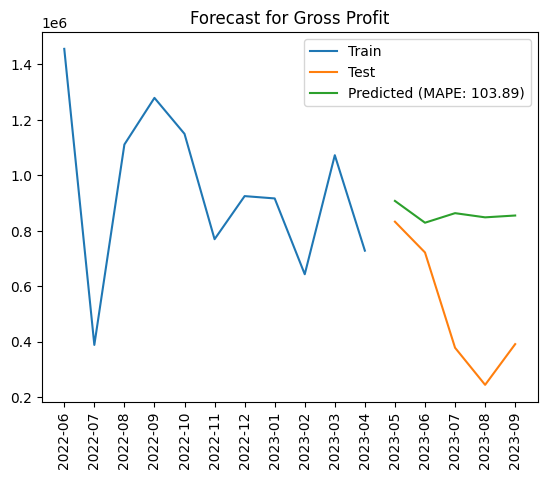

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


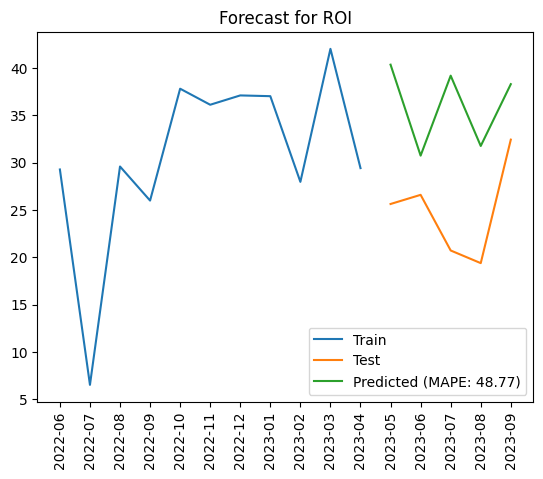

In [ ]:
import pandas as pd
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Load CSV file
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Aproximiated Financial Data - Sheet1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)
# Map month names to numerical representation
month_mapping = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

# Convert 'month' column to numeric
df['month'] = df['month'].map(month_mapping)

# # Create a PeriodIndex using a simpler approach
df['period'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-1')

# Set 'period' column as the index
df.set_index('period', inplace=True)

df.index = pd.PeriodIndex(df.index, freq="M")
df.drop(['month', 'year'], axis=1, inplace=True)

# Function to forecast a single column using ARIMA
def forecast_column(column_name):
    y = df[column_name]

    # Split the data into training and testing sets
    train_size = int(len(y) * 0.7)
    train, test = y[:train_size], y[train_size:]

    # Fit an ARIMA model
    order = (1, 1, 1)  # You may adjust the order based on the characteristics of your data
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast the next 11 months
    y_pred = model_fit.get_forecast(steps=5).predicted_mean

        # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(test, y_pred)

    # Plot the actual vs. predicted values
    plt.plot(train.index.astype(str), train, label='Train')
    plt.plot(test.index.astype(str), test, label='Test')
    plt.plot(test.index.astype(str), y_pred, label=f'Predicted (MAPE: {mape:.2f})')
    plt.title(f"Forecast for {column_name}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

    y_pred_f = model_fit.get_forecast(steps=13).predicted_mean

    return y_pred_f

# Forecast each column
forecasted_columns = {}
for column in df.columns:
    if column not in ['Actual Revenue', 'Expected Revenue']:
        forecasted_columns[column] = forecast_column(column)

# Save the forecasts to a new CSV file
forecast_df = pd.DataFrame(forecasted_columns)
forecast_df.to_csv('forecasted_data.csv', index_label='date')

In [ ]:
forecast_df

,secured loans,loan interest rate,sundry creditors,other liabilities,Capital,Cash in bank,Inventory,sundry debtors,stock in trade,other assets,Fixed assets,Cost of goods sold,Gross Profit,ROI
2023-05,1.420573e+06,14.0,7.582545e+06,1.043057e+06,4.795880e+06,129779.363828,623315.899448,2.956286e+06,2.096579e+06,1.404579e+06,9.744475e+06,2.216967e+06,907581.706937,40.338774
2023-06,3.102641e+06,14.0,7.589577e+06,1.042698e+06,4.932505e+06,156413.050647,623012.742080,2.965679e+06,2.017442e+06,1.404432e+06,1.018141e+07,2.401514e+06,828920.053460,30.737790
2023-07,1.420573e+06,14.0,7.586744e+06,1.042717e+06,4.816106e+06,177412.654937,623011.683189,2.968294e+06,1.977873e+06,1.404534e+06,1.061830e+07,2.269329e+06,863378.867308,39.179487
2023-08,3.102641e+06,14.0,7.587885e+06,1.042716e+06,4.915273e+06,193970.008913,623011.679491,2.969022e+06,1.958088e+06,1.404464e+06,1.105515e+07,2.364009e+06,848283.712308,31.757096
2023-09,1.420574e+06,14.0,7.587425e+06,1.042716e+06,4.830787e+06,207024.824941,623011.679478,2.969225e+06,1.948195e+06,1.404513e+06,1.149196e+07,2.296193e+06,854896.351544,38.283258
2023-10,3.102640e+06,14.0,7.587610e+06,1.042716e+06,4.902766e+06,217318.028903,623011.679478,2.969282e+06,1.943249e+06,1.404479e+06,1.192873e+07,2.344767e+06,851999.594428,32.545108
2023-11,1.420574e+06,14.0,7.587536e+06,1.042716e+06,4.841443e+06,225433.811429,623011.679478,2.969297e+06,1.940776e+06,1.404502e+06,1.236545e+07,2.309975e+06,853268.558527,37.590396
2023-12,3.102640e+06,14.0,7.587566e+06,1.042716e+06,4.893688e+06,231832.783629,623011.679478,2.969302e+06,1.939539e+06,1.404486e+06,1.280214e+07,2.334895e+06,852712.671437,33.154310
2024-01,1.420575e+06,14.0,7.587554e+06,1.042716e+06,4.849177e+06,236878.119071,623011.679478,2.969303e+06,1.938921e+06,1.404497e+06,1.323878e+07,2.317046e+06,852956.185384,37.054754
2024-02,3.102639e+06,14.0,7.587559e+06,1.042716e+06,4.887098e+06,240856.165690,623011.679478,2.969303e+06,1.938611e+06,1.404489e+06,1.367539e+07,2.329831e+06,852849.510767,33.625275


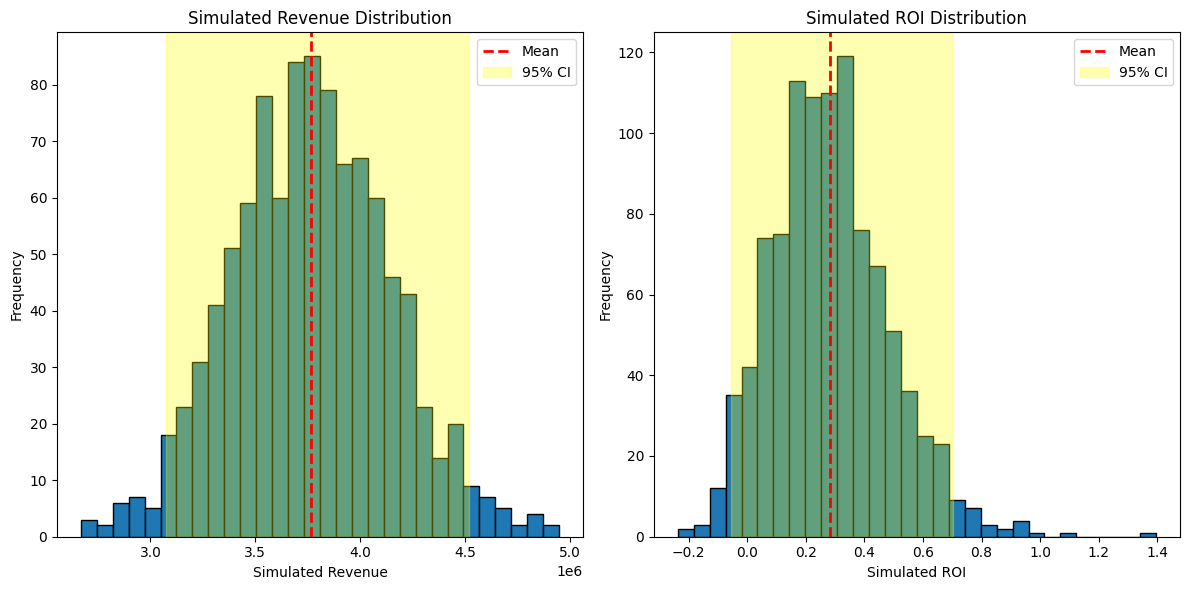

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the CSV file
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Aproximiated Financial Data - Sheet1.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract relevant columns
columns_of_interest = ['secured loans', 'loan interest rate', 'sundry creditors', 'other liabilities',
                        'Capital', 'Cash in bank', 'Inventory', 'sundry debtors', 'stock in trade',
                        'other assets', 'Fixed assets', 'Cost of goods sold', 'Expected Revenue',
                        'Actual Revenue', 'Gross Profit', 'ROI']

data = df[columns_of_interest]

# Define the number of simulations
num_simulations = 1000

# Initialize arrays to store simulation results
simulated_revenues = np.zeros(num_simulations)
simulated_roi = np.zeros(num_simulations)

# Perform Monte Carlo simulation
for i in range(num_simulations):
    # Generate random samples for each column assuming a normal distribution
    random_samples = np.random.normal(loc=data.mean(), scale=data.std(), size=data.shape)

    # Calculate simulated revenue and ROI
    simulated_revenues[i] = random_samples[:, columns_of_interest.index('Actual Revenue')].mean()  # Adjust index as needed
    simulated_roi[i] = simulated_revenues[i] / random_samples[:, columns_of_interest.index('Cost of goods sold')].mean() - 1

# Plot the results
plt.figure(figsize=(12, 6))

# Simulated Revenue
plt.subplot(1, 2, 1)
plt.hist(simulated_revenues, bins=30, edgecolor='black')
plt.title('Simulated Revenue Distribution')
plt.xlabel('Simulated Revenue')
plt.ylabel('Frequency')
plt.axvline(np.mean(simulated_revenues), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvspan(np.percentile(simulated_revenues, 2.5), np.percentile(simulated_revenues, 97.5), color='yellow', alpha=0.3, label='95% CI')
plt.legend()

# Simulated ROI
plt.subplot(1, 2, 2)
plt.hist(simulated_roi, bins=30, edgecolor='black')
plt.title('Simulated ROI Distribution')
plt.xlabel('Simulated ROI')
plt.ylabel('Frequency')
plt.axvline(np.mean(simulated_roi), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvspan(np.percentile(simulated_roi, 2.5), np.percentile(simulated_roi, 97.5), color='yellow', alpha=0.3, label='95% CI')
plt.legend()

plt.tight_layout()
plt.show()

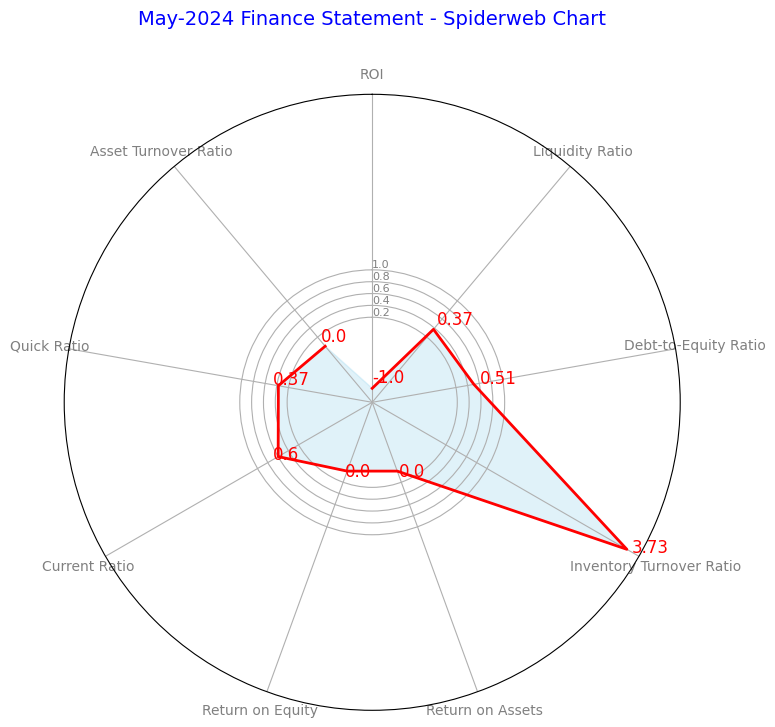

In [6]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read CSV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/may-2024-finance - Sheet1 (2).csv'
df = pd.read_csv(file_path)


# Assuming your CSV file has only one row of values
data = df.iloc[0]

# Step 2: Calculate financial ratios
secured_loans = data['secured loans']
loan_interest_rate = data['loan interest rate']
sundry_creditors = data['sundry creditors']
other_liabilities = data['other liabilities']
capital = data['Capital']
cash_in_bank = data['Cash in bank']
inventory = data['Inventory']
sundry_debtors = data['sundry debtors']
stock_in_trade = data['stock in trade']
other_assets = data['other assets']
fixed_assets = data['Fixed assets']
cost_of_goods_sold = (data['Cost of goods sold'])
expected_revenue = data['Expected Revenue']
actual_revenue = data['Actual Revenue']
gross_profit = data['Gross Profit']

# Calculate financial ratios based on your business logic
# Example ratios: ROI, liquidity ratio, debt-to-equity ratio, etc.

roi = (actual_revenue - cost_of_goods_sold) / cost_of_goods_sold
liquidity_ratio = (cash_in_bank + sundry_debtors) / (sundry_creditors + other_liabilities)
debt_to_equity_ratio = (secured_loans +other_liabilities) / capital
inventory_turnover_ratio = cost_of_goods_sold / inventory

# Additional ratios
return_on_assets = actual_revenue / (fixed_assets + other_assets)
return_on_equity = actual_revenue / capital
current_ratio = (cash_in_bank + sundry_debtors + stock_in_trade) / (sundry_creditors + other_liabilities)
quick_ratio = (cash_in_bank + sundry_debtors) / (sundry_creditors + other_liabilities)
asset_turnover_ratio = actual_revenue / (fixed_assets + other_assets)


# Step 3: Store ratios in a pandas DataFrame
ratios_data = {
    'ROI': [roi],
    'Liquidity Ratio': [liquidity_ratio],
    'Debt-to-Equity Ratio': [debt_to_equity_ratio],
    'Inventory Turnover Ratio': [inventory_turnover_ratio],
    'Return on Assets': [return_on_assets],
    'Return on Equity': [return_on_equity],
    'Current Ratio': [current_ratio],
    'Quick Ratio': [quick_ratio],
    'Asset Turnover Ratio': [asset_turnover_ratio],

}

ratios_df = pd.DataFrame.from_dict(ratios_data, orient='index', columns=['Value'])

# Step 4: Plot a spiderweb chart with values
categories = ratios_df.index
values = ratios_df['Value'].tolist()

angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.plot(angles, values, linewidth=2, linestyle='solid', color='red')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey", size=8)
plt.xticks(angles, categories, color="grey", size=10)
plt.title('May-2024 Finance Statement - Spiderweb Chart', size=14, color='blue', y=1.1)

# Add values to the chart
for i, value in enumerate(values):
    ax.text(angles[i], value + 0.1, round(value, 2), color='red', size=12)

plt.show()

In [5]:
ratios_df

,Value
ROI,-0.999984
Liquidity Ratio,0.372841
Debt-to-Equity Ratio,0.506968
Inventory Turnover Ratio,3.727914
Return on Assets,0.000002
Return on Equity,0.000007
Current Ratio,0.597439
Quick Ratio,0.372841
Asset Turnover Ratio,0.000002
